In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
filenames=os.listdir("/Users/Karthik/train")
cat=[]
for filename in filenames:
    cate=filename.split('.')[0]
    if cate == 'dog':
        cat.append(1)
    else:
        cat.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':cat
})
        
        

In [4]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [5]:
df.tail()

,filename,category
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1
25000,train,0


In [6]:
#a=np.random.randn(cat)

In [7]:
from sklearn.utils import shuffle
df=shuffle(df)

In [8]:
df

,filename,category
1308,cat.11174.jpg,0
17618,dog.3354.jpg,1
14691,dog.1197.jpg,1
11742,cat.9316.jpg,0
9490,cat.729.jpg,0
...,...,...
20473,dog.5924.jpg,1
18324,dog.3990.jpg,1
6897,cat.4956.jpg,0
814,cat.1073.jpg,0


In [9]:
df.head()

,filename,category
1308,cat.11174.jpg,0
17618,dog.3354.jpg,1
14691,dog.1197.jpg,1
11742,cat.9316.jpg,0
9490,cat.729.jpg,0


In [10]:
df.tail()

,filename,category
20473,dog.5924.jpg,1
18324,dog.3990.jpg,1
6897,cat.4956.jpg,0
814,cat.1073.jpg,0
7126,cat.5161.jpg,0


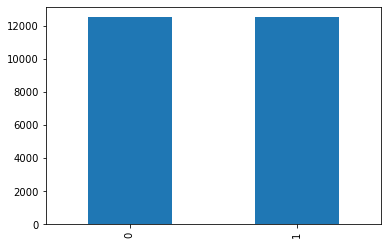

In [11]:
df['category'].value_counts().plot.bar()

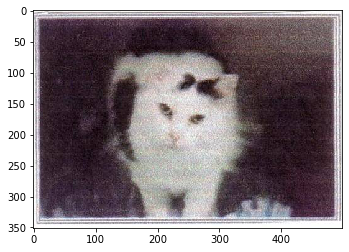

In [30]:
sample=random.choice(filenames)
image=load_img("/Users/Karthik/train/"+sample)
plt.imshow(image)

In [13]:
#Building a CNN Model
""""
Input Layer: It represent input image data. It will reshape image into single diminsion array. 
Conv Layer: This layer will extract features from image.
Pooling Layer: This layerreduce the spatial volume of input image after convolution.
Fully Connected Layer: It connect the network from a layer to another layer
Output Layer: It is the predicted values layer."""


'"\nInput Layer: It represent input image data. It will reshape image into single diminsion array. \nConv Layer: This layer will extract features from image.\nPooling Layer: This layerreduce the spatial volume of input image after convolution.\nFully Connected Layer: It connect the network from a layer to another layer\nOutput Layer: It is the predicted values layer.'

In [14]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization


In [15]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [43]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [44]:
earlystop=EarlyStopping(patience=10)

In [45]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                        patience=2,
                                        verbose=1,
                                        factor=0.5,
                                        min_lr=0.00001)

In [46]:
callbacks=[earlystop,learning_rate_reduction]

In [40]:
df["category"]=df["category"].replace({0:'cat',1:'dog'})


In [41]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

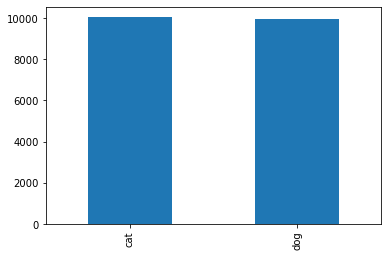

In [42]:
train_df['category'].value_counts().plot.bar()

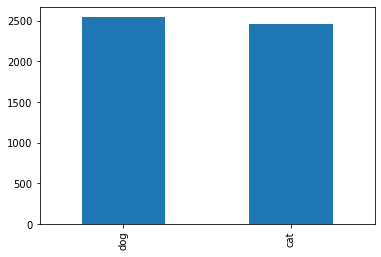

In [23]:
validate_df["category"].value_counts().plot.bar()

In [24]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [25]:
#For augumentation of image so using image data generator image preprocessor in keras

train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1
)

train_generator=train_datagen.flow_from_dataframe(
train_df,
"/Users/Karthik/train",
x_col='filename',
y_col='category',
target_size=IMAGE_SIZE,
class_mode='categorical',
batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [26]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/Users/Karthik/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


D:\Anaconda2\envs\Tensorflow\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [32]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/Users/Karthik/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


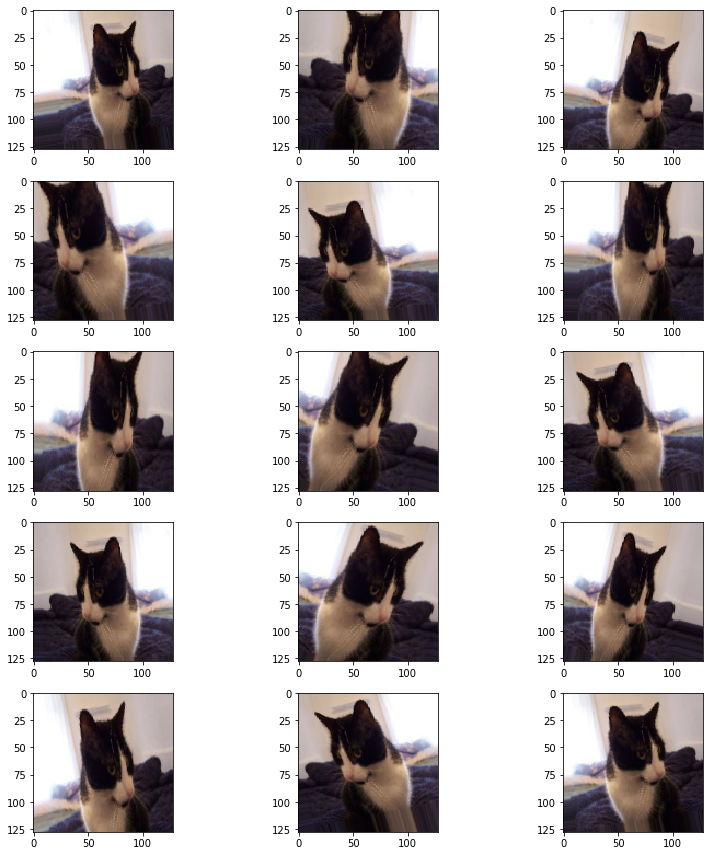

In [33]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch,Y_batch in example_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [47]:
epochs=3 if FAST_RUN else 50
history=model.fit_generator(
train_generator,
epochs=epochs,
validation_data=validation_generator,
validation_steps=total_validate//batch_size,
steps_per_epoch=total_train//batch_size,
callbacks=callbacks
)

Epoch 1/50
1333/1333 [==============================] - 376s 282ms/step - loss: 0.7425 - accuracy: 0.6384 - val_loss: 0.6413 - val_accuracy: 0.6661
Epoch 2/50
1333/1333 [==============================] - 163s 122ms/step - loss: 0.5289 - accuracy: 0.7404 - val_loss: 0.7681 - val_accuracy: 0.6785
Epoch 3/50
1333/1333 [==============================] - 168s 126ms/step - loss: 0.4884 - accuracy: 0.7715 - val_loss: 0.4307 - val_accuracy: 0.8020
Epoch 4/50
1333/1333 [==============================] - 170s 127ms/step - loss: 0.4534 - accuracy: 0.7956 - val_loss: 0.7634 - val_accuracy: 0.7433
Epoch 5/50
1333/1333 [==============================] - 168s 126ms/step - loss: 0.4267 - accuracy: 0.8072 - val_loss: 0.3773 - val_accuracy: 0.8322
Epoch 6/50
1333/1333 [==============================] - 162s 121ms/step - loss: 0.4135 - accuracy: 0.8135 - val_loss: 0.4537 - val_accuracy: 0.8108
Epoch 7/50
1333/1333 [==============================] - 167s 125ms/step - loss: 0.3957 - accuracy: 0.8210 - val_

In [48]:
model.save_weights("model.h5")

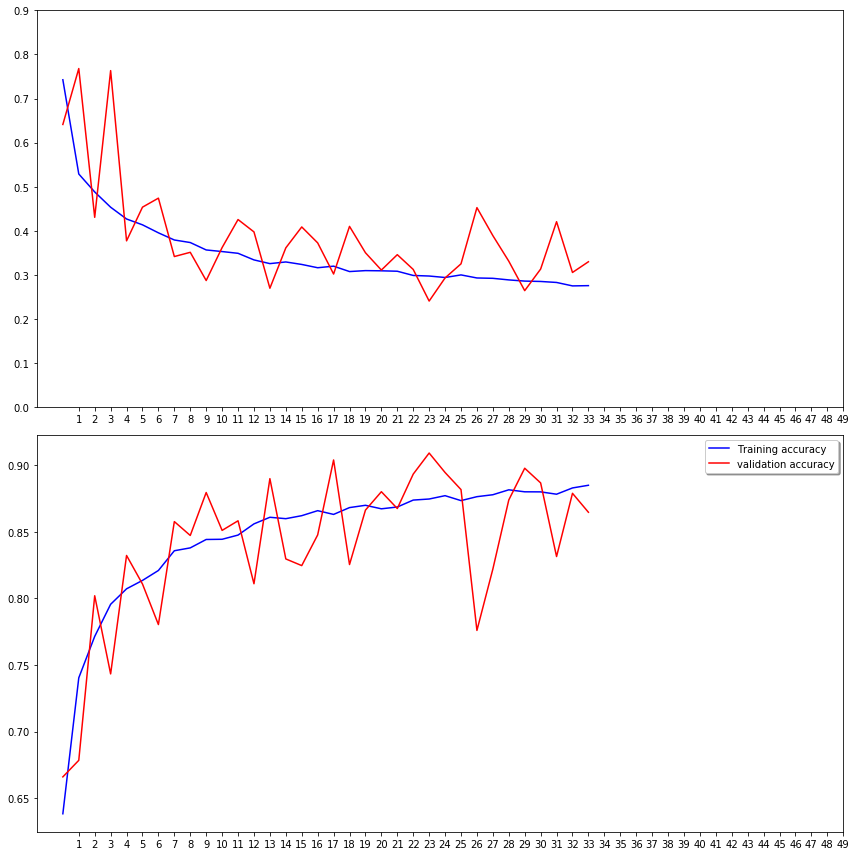

In [50]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,12))
ax1.plot(history.history['loss'],color='b',label="Training loss")
ax1.plot(history.history['val_loss'],color='r',label="Validation loss")
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history.history['accuracy'],color='b',label="Training accuracy")
ax2.plot(history.history['val_accuracy'],color='r',label="validation accuracy")
ax2.set_xticks(np.arange(1,epochs,1))

legend=plt.legend(loc='best',shadow=True)
plt.tight_layout()
plt.show()

In [51]:
test_filenames=os.listdir("/Users/Karthik/test1")
test_df=pd.DataFrame({
    'filename':test_filenames
})
nb_samples=test_df.shape[0]

In [52]:
test_gen=ImageDataGenerator(rescale=1./255)
test_generator=test_gen.flow_from_dataframe(
test_df,
"/Users/Karthik/test1/",
x_col='filename',
y_col=None,
class_mode=None,
target_size=IMAGE_SIZE,
batch_size=batch_size,
shuffle=False
    

)

Found 12500 validated image filenames.


D:\Anaconda2\envs\Tensorflow\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [53]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))